In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
d_stangen = 0.35
err_d_stangen = 0.025

d_micro_series = pd.Series([0.35] * 10 + [0.36] * 5 + [0.34] * 2)
d_micro = d_micro_series.mean()

err_d_micro_sist = 0.005
err_d_micro_rand = d_micro.std() / np.sqrt(len(d_micro_series))
err_d_micro = np.sqrt(err_d_micro_sist**2 + err_d_micro_rand**2)

s_stangen = np.pi * d_stangen ** 2 / 4
s_micro = np.pi * d_micro ** 2 / 4

err_s_stangen = 2 * s_stangen * err_d_stangen / d_stangen
err_s_micro = 2 * s_micro * err_d_micro / d_micro

print(f"d_stangen = {d_stangen} ± {err_d_stangen} mm")
print(f"d_micro = {d_micro:.3} ± {err_d_micro} mm")
print("-"*30)
print(f"s_stangen = {s_stangen:.2} ± {err_s_stangen:.1} mm^2")
print(f"s_micro = {s_micro:.2} ± {err_s_micro:.1} mm^2")


d_stangen = 0.35 ± 0.025 mm
d_micro = 0.352 ± 0.005 mm
------------------------------
s_stangen = 0.096 ± 0.01 mm^2
s_micro = 0.097 ± 0.003 mm^2


In [13]:
cols = pd.MultiIndex.from_product([[20, 30, 50], ['U', 'I']], names=['l, cm', ''])
data = pd.read_csv("data.csv")
data.columns=cols
data.index = np.arange(1, 7)
data.loc[6, (50, 'U')] = 388

data_np = data.to_numpy()

data

l, cm   20        30        50     
         U    I    U    I    U    I
1      505  273  640  211  655  130
2      360  178  450  150  585  117
3      310  152  350  115  515  108
4      240  116  290   96  425   84
5      180   89  235   77  385   77
6      145   70  195   64  388   67

l = 20cm, U=(1.7871281042537506 ± 0.14) I + (28.483587410867877 ± 2.3e+01)
l = 30cm, U=(3.0168373742278645 ± 0.041) I + (1.4991586959222576 ± 5.3)
l = 50cm, U=(4.424673848319164 ± 0.85) I + (62.235857738321165 ± 8.5e+01)
[[ 1.7871281  28.48358741]
 [ 3.01683737  1.4991587 ]
 [ 4.42467385 62.23585774]]


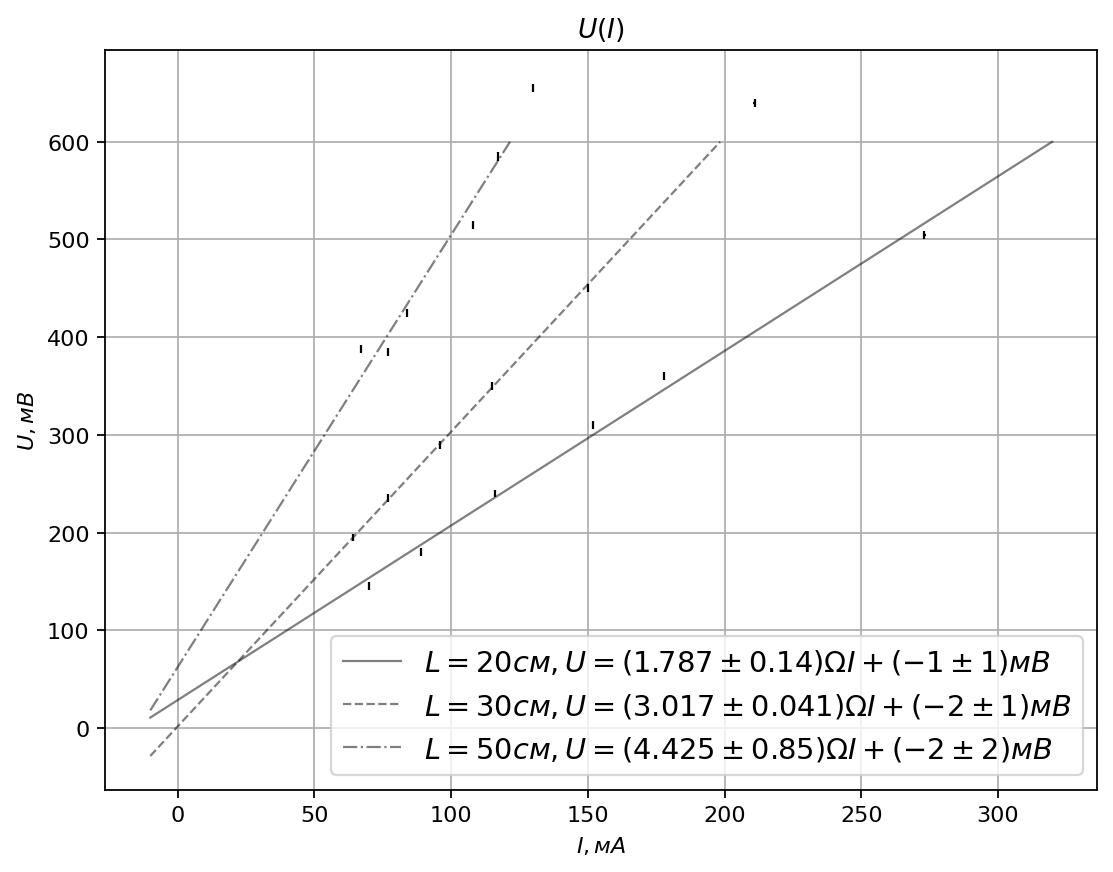

In [17]:
plt.figure(figsize=(8, 6), dpi=160)
plt.grid(True)
plt.title(r"$U(I)$")
plt.xlabel(r"$I, мА$", fontsize=10)
plt.ylabel(r"$U, мВ$", fontsize=10)


l = [20, 30, 50]
styles = ['-', '--', '-.']
eps_x = 0.2 / 100
eps_y = 0.2 / 100

coeff_matrix = np.empty((3, 2), dtype=float)
plot_list = [None] * 3

for i in range(3):
    X = data_np[:, 2*i + 1]
    Y = data_np[:, 2*i]
    X = X[~np.isnan(X)]
    Y = Y[~np.isnan(Y)]
    
    X_err = eps_x * X
    Y_err = np.sqrt((eps_y * Y) ** 2 + 4 ** 2)
    plt.errorbar(X, Y, xerr=X_err, yerr=Y_err, linestyle='',
                                 ecolor='black', elinewidth=1, zorder=32)
    
    a, b = np.polyfit(X, Y, deg=1)
    coeff_matrix[i, 0] = a
    coeff_matrix[i, 1] = b
    
    S_x = np.std(X)
    S_y = np.std(Y)
    N = len(X)
#     R_xy = np.sum(X*Y) / len(X) - np.mean(X) * np.mean(Y)
    err_a = 2 * np.sqrt((S_y ** 2 / S_x ** 2 - a ** 2) / (N - 2))
    err_b = err_a * np.sqrt(S_x ** 2 + np.mean(X) ** 2)
    plot_list[i], = plt.plot([-10, (600 - b) / a], [b - 10*a, 600], linewidth=1, alpha=0.5, color='black',
                             linestyle=styles[i], label=f"$l={l[i]}см$")
    print(f"l = {l[i]}cm, U=({a} ± {err_a:.2}) I + ({b} ± {err_b:.2})")
line_labels = [r"$L=20см, U=(1.787\pm0.14)\Omega I + (-1\pm1)мВ$",
               r"$L=30см, U=(3.017\pm0.041)\Omega I + (-2\pm1)мВ$",
               r"$L=50см, U=(4.425\pm0.85)\Omega I + (-2\pm2)мВ$"]
plt.legend(handles=plot_list, loc=4, labels=line_labels, fontsize=13)
print(coeff_matrix)
plt.savefig('../pictures/grafik.png')
plt.show()

In [22]:
S = 0.097 * 10 ** -2
dS = 0.003 * 10 ** -2
l = np.array([20, 30, 50])
dl = 0.2
R = np.array([2.057, 3.046, 5.059])
dR = 0.01

In [23]:
ro = R * S / l
dro = ro * np.sqrt((dR/R) ** 2 + (dS/S) ** 2 + (dl/l) ** 2)
ro, dro

(array([9.97645000e-05, 9.84873333e-05, 9.81446000e-05]),
 array([3.27884595e-06, 3.13269224e-06, 3.06682359e-06]))